In [1]:
import pandas as pd
import numpy as np

import keras as keras
from keras.layers import Input, Dense, BatchNormalization
from keras.models import Model, load_model
from keras.losses import mean_squared_error as mean_squared_error_k
from keras import backend as K
from keras import regularizers


Using TensorFlow backend.


In [2]:
#import CCLE data
E_CCLE = pd.read_csv('E_CCLE.csv', index_col=0)
M_CCLE = pd.read_csv('M_CCLE.csv',index_col=0)


In [3]:
E_TCGA = pd.read_csv('E_TCGA.csv',index_col=0)

In [4]:
M_TCGA = pd.read_csv('M_TCGA.csv',index_col=0)

In [5]:
IC50 = pd.read_csv('IC50_CCLE_author.csv',index_col=0)

In [6]:
E_CCLE = E_CCLE.transpose()
E_CCLE.head()

,ZBTB7A,CRH,TMEM74B,ERLIN2,ZBTB43,POLL,SPANXN1,CPNE7,OR8B3,PKHD1L1,...,C11orf87,CUEDC2,ZNF799,FOXR1,BMPER,LAMA1,EPS15,GSC2,TP53BP1,MGAM
NIHOVCAR3,2.765535,0.163499,0.863938,4.254745,3.235727,4.941576,0.0,0.925999,0.0,0.189034,...,0.014355,6.524346,0.879706,0.000000,4.386121,4.013462,4.094236,0.042644,5.428611,0.042644
HL60,2.250962,0.176323,0.042644,2.521051,1.613532,4.323370,0.0,0.097611,0.0,0.000000,...,0.000000,5.744430,1.570463,0.000000,0.137504,0.084064,3.267536,0.000000,3.026800,0.748461
CACO2,2.063503,0.056584,2.467279,4.303781,2.430285,3.713696,0.0,4.270529,0.0,0.000000,...,0.014355,4.603478,2.189034,0.000000,0.356144,2.887525,3.612352,0.000000,3.807355,0.356144
HEL,2.490570,0.000000,1.454176,4.211791,2.384050,4.375039,0.0,0.084064,0.0,0.014355,...,0.028569,6.476058,1.214125,0.028569,0.056584,0.014355,5.934752,0.000000,4.384741,0.422233
HEL9217,2.232661,0.028569,1.063503,4.180307,2.427606,4.207893,0.0,0.432959,0.0,0.000000,...,0.014355,6.458284,1.811471,0.000000,0.111031,0.014355,6.020147,0.000000,4.958379,0.584963


In [7]:
M_CCLE = M_CCLE.transpose()
M_CCLE.head()

,ZBTB7A,CRH,TMEM74B,ERLIN2,ZBTB43,POLL,SPANXN1,CPNE7,OR8B3,PKHD1L1,...,C11orf87,CUEDC2,ZNF799,FOXR1,BMPER,LAMA1,EPS15,GSC2,TP53BP1,MGAM
127399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22RV1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2313287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,2.0
253J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
M_TCGA = M_TCGA.transpose()
M_TCGA.head()

,ZBTB7A,CRH,TMEM74B,ERLIN2,ZBTB43,POLL,SPANXN1,CPNE7,OR8B3,PKHD1L1,...,C11orf87,CUEDC2,ZNF799,FOXR1,BMPER,LAMA1,EPS15,GSC2,TP53BP1,MGAM
0004d251-3f70-4395-b175-c94c2f5b1b81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000d566c-96c7-4f1c-b36e-fa2222467983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0011a67b-1ba9-4a32-a6b8-7850759a38cf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001887aa-36d0-463f-8bca-dec7043b4f2e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001944e5-af34-4061-9c09-bb9ea346f6fd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
E_TCGA = E_TCGA.transpose()
E_TCGA.head()

,ZBTB7A,CRH,TMEM74B,ERLIN2,ZBTB43,POLL,SPANXN1,CPNE7,OR8B3,PKHD1L1,...,C11orf87,CUEDC2,ZNF799,FOXR1,BMPER,LAMA1,EPS15,GSC2,TP53BP1,MGAM
d3b7ada6-5395-4212-a921-8e97c92b605d,4.256269,0.00000,0.722542,4.252478,2.521083,4.249446,0.000000,5.136277,0.0,0.201757,...,0.042784,5.354371,2.513489,0.00000,0.356247,1.131011,3.682567,0.0,3.874763,0.124460
065f7b7a-05ee-4728-bcfc-6095357512a6,3.670214,0.02871,4.086634,3.344838,2.508458,5.236450,0.000000,0.150686,0.0,0.956147,...,0.028710,6.134662,1.495726,0.00000,1.922249,0.201757,3.712564,0.0,4.603446,0.111167
065f7b7a-05ee-4728-bcfc-6095357512a6.1,4.084939,0.00000,3.150595,3.671320,2.963452,5.499225,0.000000,0.111167,0.0,0.433055,...,0.000000,6.549867,1.541050,0.00000,2.025058,0.992862,4.061800,0.0,4.644992,0.111167
c328f661-c109-4e01-b819-299a75bd4348,3.058325,0.00000,1.232706,5.463052,2.702668,4.407376,0.056724,0.632353,0.0,7.565331,...,2.241900,6.042239,1.275063,0.02871,0.555915,2.877778,4.200036,0.0,4.368048,0.000000
ebe927e6-0a7e-4c97-ad73-f3c302cca7bc,3.124356,0.00000,2.634650,4.100191,1.546046,4.803753,0.124460,3.927952,0.0,4.020564,...,0.014498,6.548086,2.153826,0.00000,0.632353,3.662199,3.561924,0.0,3.488046,0.298782


In [10]:
IC50 = IC50.transpose()
IC50.describe()


,TL-2-105,TAK-715,CP466722,BMS-345541,Genentech_Cpd_10,GSK429286A,Ruxolitinib,SB-715992,ZSTK474,KIN001-102,...,SalubriNaN,Dasatinib,XMD8-85,Roscovitine,Lapatinib,Cyclopamine,VX-680,JW-7-52-1,Erlotinib,Rapamycin
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,...,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,3.851825,4.179568,2.648195,3.096796,2.564194,4.775895,3.988149,-1.681601,1.064734,2.600120,...,4.134092,2.308223,3.609585,4.296905,3.472246,4.618005,2.561507,1.268788,3.504453,1.162873
std,1.348962,1.163468,1.357494,1.189023,1.730623,1.196296,0.957125,1.766192,1.621243,1.477692,...,1.104377,2.298384,1.309004,1.047221,1.284756,0.982353,1.933500,2.665416,1.340374,3.156771
min,-3.300900,0.337790,-1.559500,-1.281300,-2.080500,-1.231900,-3.894000,-5.881400,-4.795500,-1.946800,...,0.805350,-6.875200,-0.555480,1.608963,-3.465800,1.614506,-4.120200,-4.962900,-3.128400,-8.740200
25%,3.179982,3.374443,1.770300,2.474650,1.448693,4.039975,3.650225,-3.081100,0.099268,1.703650,...,3.319531,1.728125,2.730083,3.515567,2.700039,4.038282,1.771375,-0.840815,2.750156,-1.439800
50%,4.127273,4.180400,2.510950,3.032450,2.430800,5.026100,4.130850,-1.589500,1.082200,2.660334,...,4.154797,2.693543,3.701829,4.334692,3.449514,4.685072,2.864168,2.103007,3.462252,2.252524
75%,4.802225,4.943575,3.466250,3.733850,3.852461,5.614975,4.544700,-0.203313,2.086386,3.472250,...,4.923978,3.594486,4.449912,5.025206,4.209411,5.279645,3.738891,3.090705,4.298803,3.389612
max,7.131900,7.270100,6.421600,6.590200,6.788900,7.723000,6.402000,2.639200,5.416200,6.610200,...,7.530984,7.188214,7.528620,7.526581,7.421676,7.538469,7.198368,6.569982,7.192988,7.207537


In [11]:
def metric_mse(y_true, y_pred):
    if isinstance(scaler, StandardScaler):
        _y_true = y_true * scaler.scale_ + scaler.mean_
        _y_pred = y_pred * scaler.scale_ + scaler.mean_        
    else:
        _y_true = y_true * (scaler.data_max_ - scaler.data_min_) + scaler.data_min_
        _y_pred = y_pred * (scaler.data_max_ - scaler.data_min_) + scaler.data_min_
    return mean_squared_error_k(_y_true, _y_pred)

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
class DummyScaler:
    def fit(self, x):
        self.data_min_ = np.zeros(x.shape[1],)
        self.data_max_ = np.ones(x.shape[1],)
    def transform(self, x): return x
    

In [19]:
#Pretain autoencoder E_TCGA

In [73]:
scaler = StandardScaler()#MinMaxScaler()#DummyScaler() 
if scaler:
    scaler.fit(E_TCGA)
    E_TCGA_norm = pd.DataFrame(scaler.transform(E_TCGA), columns = E_TCGA.columns, index=E_TCGA.index)
    print (E_TCGA_norm['ALAS1'].mean(), E_TCGA_norm['ALAS1'].std())
    print(E_TCGA_norm['ALAS1'].describe())

1.5888884147130225e-14 1.0000536121163788
count    9.327000e+03
mean     1.588888e-14
std      1.000054e+00
min     -4.705958e+00
25%     -6.037910e-01
50%     -1.103349e-01
75%      4.394181e-01
max      7.390753e+00
Name: ALAS1, dtype: float64


In [128]:
E_TCGA['ALAS1'].describe()

count    9327.000000
mean        5.186317
std         0.781032
min         1.511009
25%         4.714762
50%         5.100147
75%         5.529499
max        10.958425
Name: ALAS1, dtype: float64

In [242]:
#reserve a random sample of 2000 samples to validate the model
from random import sample 
valid_idx = sample(list(E_TCGA_norm.index.values),2000 )
x_valid =  E_TCGA_norm.loc[valid_idx, :]
x_train = E_TCGA_norm.drop(valid_idx, axis=0)
print (x_train.shape) 
print (x_valid.shape)
x_train.describe()

(7327, 17947)
(2000, 17947)


,ZBTB7A,CRH,TMEM74B,ERLIN2,ZBTB43,POLL,SPANXN1,CPNE7,OR8B3,PKHD1L1,...,C11orf87,CUEDC2,ZNF799,FOXR1,BMPER,LAMA1,EPS15,GSC2,TP53BP1,MGAM
count,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,...,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000
mean,0.009693,-0.000380,0.006575,0.000902,0.001601,0.003001,0.000220,0.009953,0.005609,-0.006840,...,-0.000134,-0.000056,0.000507,0.001017,-0.003382,-0.003273,0.001984,0.004558,-0.002147,0.004717
std,1.006901,0.994432,1.005821,0.997027,1.007557,1.003701,0.980103,1.008354,1.027576,0.990218,...,0.996895,1.002634,0.998395,1.009098,0.991424,1.000763,1.006319,1.048184,1.004097,1.007570
min,-3.463876,-0.224101,-1.445642,-3.681745,-3.134870,-4.882774,-0.151950,-1.364514,-0.125737,-0.583487,...,-0.325821,-4.898671,-2.730503,-0.200066,-0.750925,-1.087274,-3.972733,-0.240360,-4.073098,-0.512949
25%,-0.612778,-0.224101,-0.752912,-0.617464,-0.641920,-0.674657,-0.151950,-0.813741,-0.125737,-0.557638,...,-0.325821,-0.624563,-0.647131,-0.200066,-0.606318,-0.819710,-0.624434,-0.240360,-0.567393,-0.463369
50%,-0.031765,-0.224101,-0.242721,0.032530,0.047619,0.027605,-0.151950,-0.191196,-0.125737,-0.368382,...,-0.298873,0.033401,-0.041558,-0.200066,-0.388495,-0.352278,0.017806,-0.240360,0.070388,-0.353454
75%,0.539309,-0.189398,0.533483,0.627726,0.662155,0.715021,-0.151950,0.627348,-0.125737,0.098185,...,-0.246294,0.648430,0.612988,-0.200066,0.156898,0.627201,0.621695,-0.240360,0.657848,-0.074193
max,3.964197,13.413552,5.577861,6.729774,4.403603,3.677282,29.626407,4.546028,32.317783,7.454908,...,10.451065,4.115365,6.498394,14.465617,6.262715,4.283479,4.263484,36.575135,3.032769,7.443353


In [163]:
x_train.values[2,:100]


array([-0.60143198, -0.224101  ,  1.23015433, -0.16934295, -1.11478644,
        1.36576949,  1.54109185,  1.52567138, -0.12573675,  3.03639345,
       -0.40321354,  0.64817569,  0.08664087,  0.03905313, -0.87346493,
       -0.35348861, -0.71347249, -0.64677551,  0.30490414,  0.26958662,
       -0.05955466,  0.25128114,  0.82137919,  0.51169417,  0.2659441 ,
       -0.1566827 ,  0.81302147, -0.95344303, -0.19268109, -1.10825634,
       -0.40384554,  0.76446591,  1.25222788, -0.66915377, -0.10486425,
       -0.57814031, -0.11866222,  0.86400945,  0.6157417 , -0.34130126,
        0.04553338, -0.99195321,  0.86074894,  0.66635639,  0.7959031 ,
       -0.41670092,  0.72041842, -0.33437416,  0.43932365,  0.09403434,
        0.87248608,  0.01197119,  0.2139697 ,  0.34422521,  0.54293969,
       -0.61395205, -0.54113584, -0.28793543,  0.27388216, -0.22771071,
       -0.09295591, -0.54098464,  0.80187533,  0.13049861, -0.21947257,
       -0.50753111, -0.85491366, -0.19717264, -0.41004755, -0.48

In [132]:
#Train a gene expresion autoencoder with TCGA data (n_samples, n_genes), Eenc (n_genes, 1,024, 256, and 64)

In [28]:
encoding_dim = 64  # 64 floats -> compression of factor 343, assuming the input is 22374 floats

tumor_dim = E_TCGA.shape[1]
tumor_dim


18528

In [29]:
K.clear_session()
layers = [1024,256,128]

# this is our input placeholder
input_tumor = Input(shape=(tumor_dim,))
use_bn = False
# "encoded" is the encoded representation of the input
for i,layer in enumerate(layers):
    encoded = Dense(layer, activation='relu')(input_tumor if i == 0 else encoded)
    if use_bn: encoded = BatchNormalization()(encoded)
#encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

for i,layer in enumerate(layers[::-1]): 
    decoded = Dense(layer, activation='relu')(encoded if i == 0 else decoded)
    if use_bn: decoded = BatchNormalization()(decoded)
out = Dense(tumor_dim, activation='linear')(decoded)


Instructions for updating:
Colocations handled automatically by placer.


In [30]:
# this model maps an input to its reconstruction
autoencoder = Model(input_tumor, out)
# this model maps an input to its encoded representation
encoder = Model(input_tumor, encoded)

In [31]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 18528)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              18973696  
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
__________

In [34]:
# create a placeholder for an encoded (64-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
#decoder = Model(encoded_input, decoder_layer(encoded_input))
#decoder = Model(encoded_input, decoder_layer(encoded_input))

In [170]:
adam = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
autoencoder.compile(optimizer= adam, loss='mean_squared_error', metrics=[metric_mse])
#autoencoder.compile(optimizer= adam, loss='binary_crossentropy')


In [172]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_valid, x_valid))

Train on 7327 samples, validate on 2000 samples
Epoch 1/100
7327/7327 [==============================] - 9s 1ms/step - loss: 0.6949 - metric_mse: 0.7393 - val_loss: 0.5456 - val_metric_mse: 0.5538
Epoch 2/100
7327/7327 [==============================] - 9s 1ms/step - loss: 0.5084 - metric_mse: 0.4882 - val_loss: 0.4524 - val_metric_mse: 0.4343
Epoch 3/100
7327/7327 [==============================] - 9s 1ms/step - loss: 0.4392 - metric_mse: 0.4082 - val_loss: 0.4162 - val_metric_mse: 0.3911
Epoch 4/100
7327/7327 [==============================] - 9s 1ms/step - loss: 0.4088 - metric_mse: 0.3739 - val_loss: 0.3959 - val_metric_mse: 0.3675
Epoch 5/100
7327/7327 [==============================] - 9s 1ms/step - loss: 0.3878 - metric_mse: 0.3517 - val_loss: 0.3814 - val_metric_mse: 0.3515
Epoch 6/100
7327/7327 [==============================] - 9s 1ms/step - loss: 0.3712 - metric_mse: 0.3344 - val_loss: 0.3704 - val_metric_mse: 0.3396
Epoch 7/100
7327/7327 [==============================] - 9

In [219]:
autoencoder.save('model_encoder_E_TCGA_std.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model



In [243]:
p = autoencoder.predict(x_valid)
np.set_printoptions(suppress=True)
np.around(p[1][:100],decimals=8)

array([ 1.0857009 ,  0.06824583,  0.94729114, -0.27819464,  0.02031765,
        0.25912333, -0.22548953,  1.6036053 , -0.14870858, -0.10596123,
       -0.5652775 ,  1.2278466 , -0.00867097, -1.0842278 ,  0.8159287 ,
       -0.06325143, -0.67181253, -0.39295903,  0.36419675, -0.35738456,
       -1.0666223 ,  1.0985821 ,  1.1053166 ,  0.9156634 , -0.30579123,
       -0.23819244, -1.3039116 ,  0.5442993 , -0.21570754,  0.5543682 ,
       -0.43463165, -0.620371  , -0.45542783,  0.8378333 , -0.02170878,
        1.5418226 , -0.5942787 , -0.65844685,  1.7723801 , -0.50450635,
       -0.16782995,  0.6691558 , -0.06961058,  0.18973294,  1.233103  ,
        0.51065665, -1.081161  ,  0.7214816 , -0.35820872, -1.4884266 ,
        0.18780673, -0.07354928,  0.7202826 ,  0.6142722 ,  0.31557426,
       -0.07264862, -0.6306247 , -0.43787003, -0.42254308,  0.40754843,
       -0.2740486 , -0.9930557 , -0.8932992 ,  0.9787187 , -0.6586889 ,
       -1.2373184 , -0.30529714,  0.04399962, -0.573373  , -0.55

In [250]:
from sklearn.metrics import mean_squared_error
i = 10
y_true = x_valid.values
y_pred = p
print ('MSE scale non reverted')
print(mean_squared_error(y_true, y_pred))

def rescale(y_true, y_pred):
    if isinstance(scaler, StandardScaler):
        _y_true = y_true * scaler.scale_ + scaler.mean_
        _y_pred = y_pred * scaler.scale_ + scaler.mean_        
    else:
        _y_true = y_true * (scaler.data_max_ - scaler.data_min_) + scaler.data_min_
        _y_pred = y_pred * (scaler.data_max_ - scaler.data_min_) + scaler.data_min_
    return _y_true, _y_pred

_y_true, _y_pred = rescale(y_true, y_pred)


print ('MSE scale reverted')
print(mean_squared_error(_y_true, _y_pred))
print ('Example of reconstructed sample (true, pred)')
print(list(zip(_y_true[i], _y_pred[i])))

x_valid_original =  E_TCGA.loc[valid_idx, :]
y_true_original = x_valid_original.values
#print(mean_squared_error(y_true_original,_y_true))
#mean_squared_error(y_true_original,_y_pred)

MSE scale non reverted
0.24232213406541916
MSE scale reverted
0.21866313900272216
Example of reconstructed sample (true, pred)
[(2.39509677887, 2.616115687542038), (0.0, 0.40006371814783376), (0.42232954502100006, 0.448405411366969), (4.29354047775, 4.202734701290774), (1.29874289036, 1.7236507802225904), (3.9827773571, 4.240069463302671), (0.0, -0.018373681028390435), (3.97088313103, 2.878267516981059), (0.0, -0.03191676171651242), (0.201756611466, 0.6801867507857493), (0.08420307189230003, 0.10146719855195963), (5.67891359329, 6.036370679276383), (5.561939239500001, 5.809828370136553), (6.05681610107, 5.775943017779402), (6.25716876984, 6.330638655718493), (5.49218416214, 5.250539056591089), (0.0, 0.5181341883437196), (0.0, 0.06920357028372387), (7.01915550232, 6.615071262206714), (0.6041815876959999, 0.8021172488142472), (0.056723508983899995, 0.9056971339773822), (4.34132003784, 4.196582466211217), (1.0215282440200002, 1.7149368860555716), (5.8572807312, 5.45576905410783), (1.84806

In [245]:
x_valid.iloc[1,:100].values

array([ 0.79446131, -0.224101  ,  0.3329135 , -0.50821124,  0.49585691,
        0.08309032, -0.15195033,  1.233672  , -0.12573675, -0.12791866,
       -0.59962976,  1.06480776, -0.56852552, -0.86782644,  1.08451871,
        0.41865604, -0.46641535,  0.14889334,  0.27237021, -0.31060436,
       -1.08883595,  1.41359084,  1.40044085,  0.01211876, -0.21194254,
       -0.1566827 , -1.70652202,  0.04290158, -0.19268109,  0.39925229,
       -0.39158082, -0.73928893, -1.12290195,  0.85737805, -0.10486425,
        1.41418462, -0.46951688, -0.74462564,  1.99010997, -0.36327517,
       -0.21769532,  0.7137195 ,  0.32238122, -0.27900254,  1.39465624,
        0.12685601, -1.36714766,  0.31398167,  0.09819182, -2.20063631,
       -0.31554638,  0.64361745,  1.22867843,  1.50691518,  0.25428098,
       -0.40653707, -0.54113584, -0.20670703, -0.68358694,  0.34343007,
       -0.09295591, -0.94641527, -1.07739083,  0.73163636,  0.49701352,
       -1.96851667, -0.69109544, -0.19717264, -1.01274304, -0.49

In [240]:
autoencoder = load_model('model_encoder_E_TCGA_std.h5', custom_objects={'metric_mse':metric_mse})

In [21]:
#Train M_TCGA autoencoder 
M_TCGA.describe()

,0004d251-3f70-4395-b175-c94c2f5b1b81,000d566c-96c7-4f1c-b36e-fa2222467983,0011a67b-1ba9-4a32-a6b8-7850759a38cf,001887aa-36d0-463f-8bca-dec7043b4f2e,001944e5-af34-4061-9c09-bb9ea346f6fd,001ad307-4ad3-4f1d-b2fc-efc032871c7e,001cef41-ff86-4d3f-a140-a647ac4b10a1,001e0309-9c50-42b0-9e38-347883ee2cd3,0022478c-4dfd-4cbe-a05e-fb20310844e3,0024ab57-4036-4b0f-b7a1-040f97787022,...,ffc73551-55e9-4bbb-bd15-76088551964b,ffc915b8-cacd-4974-a040-ee496f0efc0e,ffcec8e5-9fd3-4b42-a7cb-74761f713cf4,ffcf851d-7fa1-4b45-911a-a3fbd74c253a,ffcfa005-a04f-458e-9d1d-86143dd823e5,ffd8d31f-bc4b-4e19-bbaf-0e26e9f3a107,ffedc8be-1056-4205-b9d9-99b5bdb872db,fff304a2-113f-499d-a88c-9d3660c348d9,fff35c80-88cd-4923-80c1-0273ba5bed0f,fffdb1d9-58d1-425c-ac12-1e1e5f443bf7
count,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.00000,18528.000000,18528.000000,18528.000000,...,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000
mean,0.022668,0.001403,0.021859,0.005073,0.020833,0.007826,0.00448,0.006854,0.013331,0.001943,...,0.000594,0.002321,0.007772,0.022291,0.027310,0.019214,0.010093,0.002699,0.001781,0.000432
std,0.300992,0.046444,0.395374,0.134172,0.277234,0.173836,0.12086,0.174497,0.208279,0.085023,...,0.028448,0.090845,0.172435,0.268916,0.318734,0.231063,0.191456,0.094046,0.069287,0.034457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,2.000000,32.000000,4.000000,8.000000,9.000000,6.00000,10.000000,7.000000,4.000000,...,2.000000,4.000000,4.000000,8.000000,8.000000,5.000000,4.000000,4.000000,4.000000,3.000000


In [50]:
def func(x):
    if x > 0:
        return 1
    else:
        return 0

In [51]:
M_TCGA_binary = M_TCGA.applymap(func)

In [52]:

#reserve a random sample of 2000 samples to validate the model
from random import sample 
valid_idx = sample(list(M_TCGA_binary.index.values),2000)
x_valid =  M_TCGA_binary.loc[valid_idx, :]
x_train = M_TCGA_binary.drop(valid_idx, axis=0)
print (x_train.shape) 
print (x_valid.shape)
x_train.describe()

(8189, 18528)
(2000, 18528)


,ZBTB7A,CRH,TMEM74B,ERLIN2,ZBTB43,POLL,SPANXN1,CPNE7,OR8B3,PKHD1L1,...,C11orf87,CUEDC2,ZNF799,FOXR1,BMPER,LAMA1,EPS15,GSC2,TP53BP1,MGAM
count,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,...,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000,8189.000000
mean,0.017951,0.003297,0.007571,0.016486,0.025522,0.013799,0.009159,0.010136,0.010624,0.093052,...,0.014287,0.007205,0.014898,0.006594,0.030040,0.073269,0.016486,0.001465,0.032360,0.068507
std,0.132781,0.057329,0.086688,0.127341,0.157714,0.116663,0.095267,0.100170,0.102530,0.290523,...,0.118680,0.084580,0.121152,0.080942,0.170709,0.260593,0.127341,0.038255,0.176966,0.252629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
encoding_dim = 64  

tumor_dim = M_TCGA.shape[1]
tumor_dim


18528

In [64]:
adam = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
autoencoder.compile(optimizer= adam, loss='binary_crossentropy')

In [65]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_valid, x_valid))

Train on 8189 samples, validate on 2000 samples
Epoch 1/100
8189/8189 [==============================] - 15s 2ms/step - loss: 3.6261 - val_loss: 3.6343
Epoch 2/100
8189/8189 [==============================] - 14s 2ms/step - loss: 3.6261 - val_loss: 3.6343
Epoch 3/100
8189/8189 [==============================] - 14s 2ms/step - loss: 3.6261 - val_loss: 3.6343
Epoch 4/100
3328/8189 [===========>..................] - ETA: 7s - loss: 3.6270

KeyboardInterrupt: 

In [57]:
p = autoencoder.predict(x_valid)
np.set_printoptions(suppress=True)
np.around(p[1][:100],decimals=8)

array([ 0.03295425,  0.00450331, -0.00305055,  0.00844298,  0.02429162,
        0.00246009,  0.0691133 , -0.00616959, -0.00267753,  0.05292072,
        0.00767842,  0.00808272,  0.00932105,  0.02771122, -0.0099472 ,
        0.00865723,  0.0377667 ,  0.0140667 , -0.0305408 , -0.0200322 ,
        0.02574384,  0.02296967, -0.01632816,  0.00756015,  0.00300462,
        0.00984392,  0.01722927,  0.01884098, -0.00444045,  0.02266387,
        0.00173058,  0.02177672, -0.01367084,  0.00702611,  0.02642312,
       -0.02753592,  0.01125671, -0.00929729,  0.00375465,  0.01125441,
        0.02462854,  0.05879453,  0.0067295 ,  0.01502591,  0.01271677,
       -0.01916238,  0.02171273,  0.01132043,  0.0114773 ,  0.01384891,
       -0.00930674,  0.01523851,  0.00997097, -0.0157119 ,  0.01575306,
        0.04938052,  0.01797203,  0.01778401,  0.01896708, -0.0031248 ,
        0.02151208, -0.00174115,  0.02536343,  0.02180072,  0.00498144,
        0.00112822,  0.07569998, -0.03469582, -0.01614546,  0.00

In [58]:
x_valid.iloc[1,:100].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
#Complete architecture
#load pretrained E_TCGA encoderç
K.clear_session()

autoencoder = load_model('model_encoder_E_TCGA_std.h5', custom_objects={'metric_mse':metric_mse})


Instructions for updating:
Use tf.cast instead.


In [16]:
encoder = autoencoder#.layers[:-4]
for n in range(4): encoder.layers.pop()
# Check the trainable status of the individual layers
#for layer in encoder:
#    print(layer, layer.trainable)

In [17]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 17947)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              18378752  
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
Total params: 37,382,491
Trainable params: 37,382,491
Non-trainable params: 0
_________________________________________________________________


/home/auri/anaconda3/envs/gen/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [18]:
n_drugs = IC50.shape[1]
cell_dim = E_CCLE.shape[1]
layers = [128,128,128]

# this is our input placeholder
input_cell = Input(shape=(cell_dim,))

x = encoder(input_cell)
use_bn = False
for i,layer in enumerate(layers):
    l = Dense(layer, activation='relu')(x if i == 0 else l)
    if use_bn: l = BatchNormalization()(l)
out = Dense(n_drugs, activation='linear')(l)

In [19]:
IC50_Predictor = Model(input_cell, out)

In [20]:
IC50_Predictor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 17947)             0         
_________________________________________________________________
model_1 (Model)              (None, 17947)             18682304  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2297344   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 265)               34185     
Total params: 21,046,857
Trainable params: 21,046,857
Non-trainable params: 0
________________________________________________________________

In [21]:
adam = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
IC50_Predictor.compile(optimizer= adam, loss='mean_squared_error')

In [72]:
E_CCLE.head()

,ZBTB7A,CRH,TMEM74B,ERLIN2,ZBTB43,POLL,SPANXN1,CPNE7,OR8B3,PKHD1L1,...,C11orf87,CUEDC2,ZNF799,FOXR1,BMPER,LAMA1,EPS15,GSC2,TP53BP1,MGAM
NIHOVCAR3,2.765535,0.163499,0.863938,4.254745,3.235727,4.941576,0.0,0.925999,0.0,0.189034,...,0.014355,6.524346,0.879706,0.000000,4.386121,4.013462,4.094236,0.042644,5.428611,0.042644
HL60,2.250962,0.176323,0.042644,2.521051,1.613532,4.323370,0.0,0.097611,0.0,0.000000,...,0.000000,5.744430,1.570463,0.000000,0.137504,0.084064,3.267536,0.000000,3.026800,0.748461
CACO2,2.063503,0.056584,2.467279,4.303781,2.430285,3.713696,0.0,4.270529,0.0,0.000000,...,0.014355,4.603478,2.189034,0.000000,0.356144,2.887525,3.612352,0.000000,3.807355,0.356144
HEL,2.490570,0.000000,1.454176,4.211791,2.384050,4.375039,0.0,0.084064,0.0,0.014355,...,0.028569,6.476058,1.214125,0.028569,0.056584,0.014355,5.934752,0.000000,4.384741,0.422233
HEL9217,2.232661,0.028569,1.063503,4.180307,2.427606,4.207893,0.0,0.432959,0.0,0.000000,...,0.014355,6.458284,1.811471,0.000000,0.111031,0.014355,6.020147,0.000000,4.958379,0.584963


In [14]:
scaler = StandardScaler()#MinMaxScaler()#DummyScaler() 
if scaler:
    scaler.fit(E_CCLE)
    E_CCLE_norm = pd.DataFrame(scaler.transform(E_CCLE), columns = E_CCLE.columns, index=E_CCLE.index)
    print (E_CCLE_norm['ALAS1'].mean(), E_CCLE_norm['ALAS1'].std())
    print(E_CCLE_norm['ALAS1'].describe())

-1.0340083581921978e-14 1.000429461046209
count    1.165000e+03
mean    -1.034008e-14
std      1.000429e+00
min     -5.767381e+00
25%     -6.566953e-01
50%     -2.205050e-02
75%      5.994854e-01
max      5.028037e+00
Name: ALAS1, dtype: float64


In [24]:
E_CCLE_IC50 = pd.merge(E_CCLE_norm,IC50,left_on=E_CCLE_norm.index, right_on=IC50.index)

In [25]:
E_CCLE_IC50.index = E_CCLE_IC50.key_0
E_CCLE_IC50.drop(columns='key_0', inplace=True)
E_CCLE_IC50.columns

Index(['ZBTB7A', 'CRH', 'TMEM74B', 'ERLIN2', 'ZBTB43', 'POLL', 'SPANXN1',
       'CPNE7', 'OR8B3', 'PKHD1L1',
       ...
       'SalubriNaN', 'Dasatinib', 'XMD8-85', 'Roscovitine', 'Lapatinib',
       'Cyclopamine', 'VX-680', 'JW-7-52-1', 'Erlotinib', 'Rapamycin'],
      dtype='object', length=18212)

In [26]:
#reserve a random sample of 20% samples to validate the model
from random import sample 
valid = int(E_CCLE_IC50.shape[0]*0.1)
valid_idx = sample(list(E_CCLE_IC50.index.values),valid)
x_valid =  E_CCLE_IC50.loc[valid_idx, :]
x_train = E_CCLE_IC50.drop(valid_idx, axis=0)
print (x_train.shape) 
print (x_valid.shape)
#x_train.describe()

(549, 18212)
(61, 18212)


In [72]:
y_train = x_train.iloc[:,-IC50.shape[1]:]
X_train = x_train.iloc[:,:-IC50.shape[1]]
print(y_train.shape)
print(X_train.shape)
y_valid = x_valid.iloc[:,-IC50.shape[1]:]
X_valid = x_valid.iloc[:,:-IC50.shape[1]]
print(y_valid.shape)
print(X_valid.shape)

(549, 265)
(549, 17947)
(61, 265)
(61, 17947)


In [78]:
IC50_Predictor.fit(X_train, y_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_valid, y_valid))

Train on 549 samples, validate on 61 samples
Epoch 1/100
549/549 [==============================] - 1s 2ms/step - loss: 11.8359 - val_loss: 10.4408
Epoch 2/100
549/549 [==============================] - 1s 1ms/step - loss: 9.9166 - val_loss: 8.0261
Epoch 3/100
549/549 [==============================] - 1s 1ms/step - loss: 7.5842 - val_loss: 5.8667
Epoch 4/100
549/549 [==============================] - 1s 1ms/step - loss: 5.5654 - val_loss: 4.1904
Epoch 5/100
549/549 [==============================] - 1s 1ms/step - loss: 4.0974 - val_loss: 3.1799
Epoch 6/100
549/549 [==============================] - 1s 1ms/step - loss: 3.0665 - val_loss: 2.5761
Epoch 7/100
549/549 [==============================] - 1s 1ms/step - loss: 2.5230 - val_loss: 2.1723
Epoch 8/100
549/549 [==============================] - 1s 1ms/step - loss: 2.2569 - val_loss: 2.0779
Epoch 9/100
549/549 [==============================] - 1s 1ms/step - loss: 2.0851 - val_loss: 2.0591
Epoch 10/100
549/549 [======================

Epoch 81/100
549/549 [==============================] - 1s 1ms/step - loss: 0.9379 - val_loss: 1.9394
Epoch 82/100
549/549 [==============================] - 1s 1ms/step - loss: 0.9244 - val_loss: 1.9210
Epoch 83/100
549/549 [==============================] - 1s 1ms/step - loss: 0.9145 - val_loss: 1.9125
Epoch 84/100
549/549 [==============================] - 1s 1ms/step - loss: 0.9060 - val_loss: 1.9148
Epoch 85/100
549/549 [==============================] - 1s 1ms/step - loss: 0.8984 - val_loss: 1.9078
Epoch 86/100
549/549 [==============================] - 1s 1ms/step - loss: 0.8878 - val_loss: 1.9239
Epoch 87/100
549/549 [==============================] - 1s 1ms/step - loss: 0.8787 - val_loss: 1.8936
Epoch 88/100
549/549 [==============================] - 1s 1ms/step - loss: 0.8744 - val_loss: 1.8773
Epoch 89/100
549/549 [==============================] - 1s 1ms/step - loss: 0.8645 - val_loss: 1.9123
Epoch 90/100
549/549 [==============================] - 1s 1ms/step - loss: 0.8615

In [81]:
IC50_Predictor.save_weights('IC50_Predictor_weights.h5')

In [22]:
IC50_Predictor.load_weights('IC50_Predictor_weights.h5')

In [29]:
p = IC50_Predictor.predict(E_CCLE_IC50.iloc[:,:-IC50.shape[1]])
p_CCLE_IC50 = p.transpose()

In [43]:
y_CCLE_IC50 = E_CCLE_IC50.iloc[:,-IC50.shape[1]:]
y_CCLE_IC50 = y_CCLE_IC50.transpose()
y_CCLE_IC50.shape

(265, 610)

Text(0.5,1,'predicted CCLE IC50')

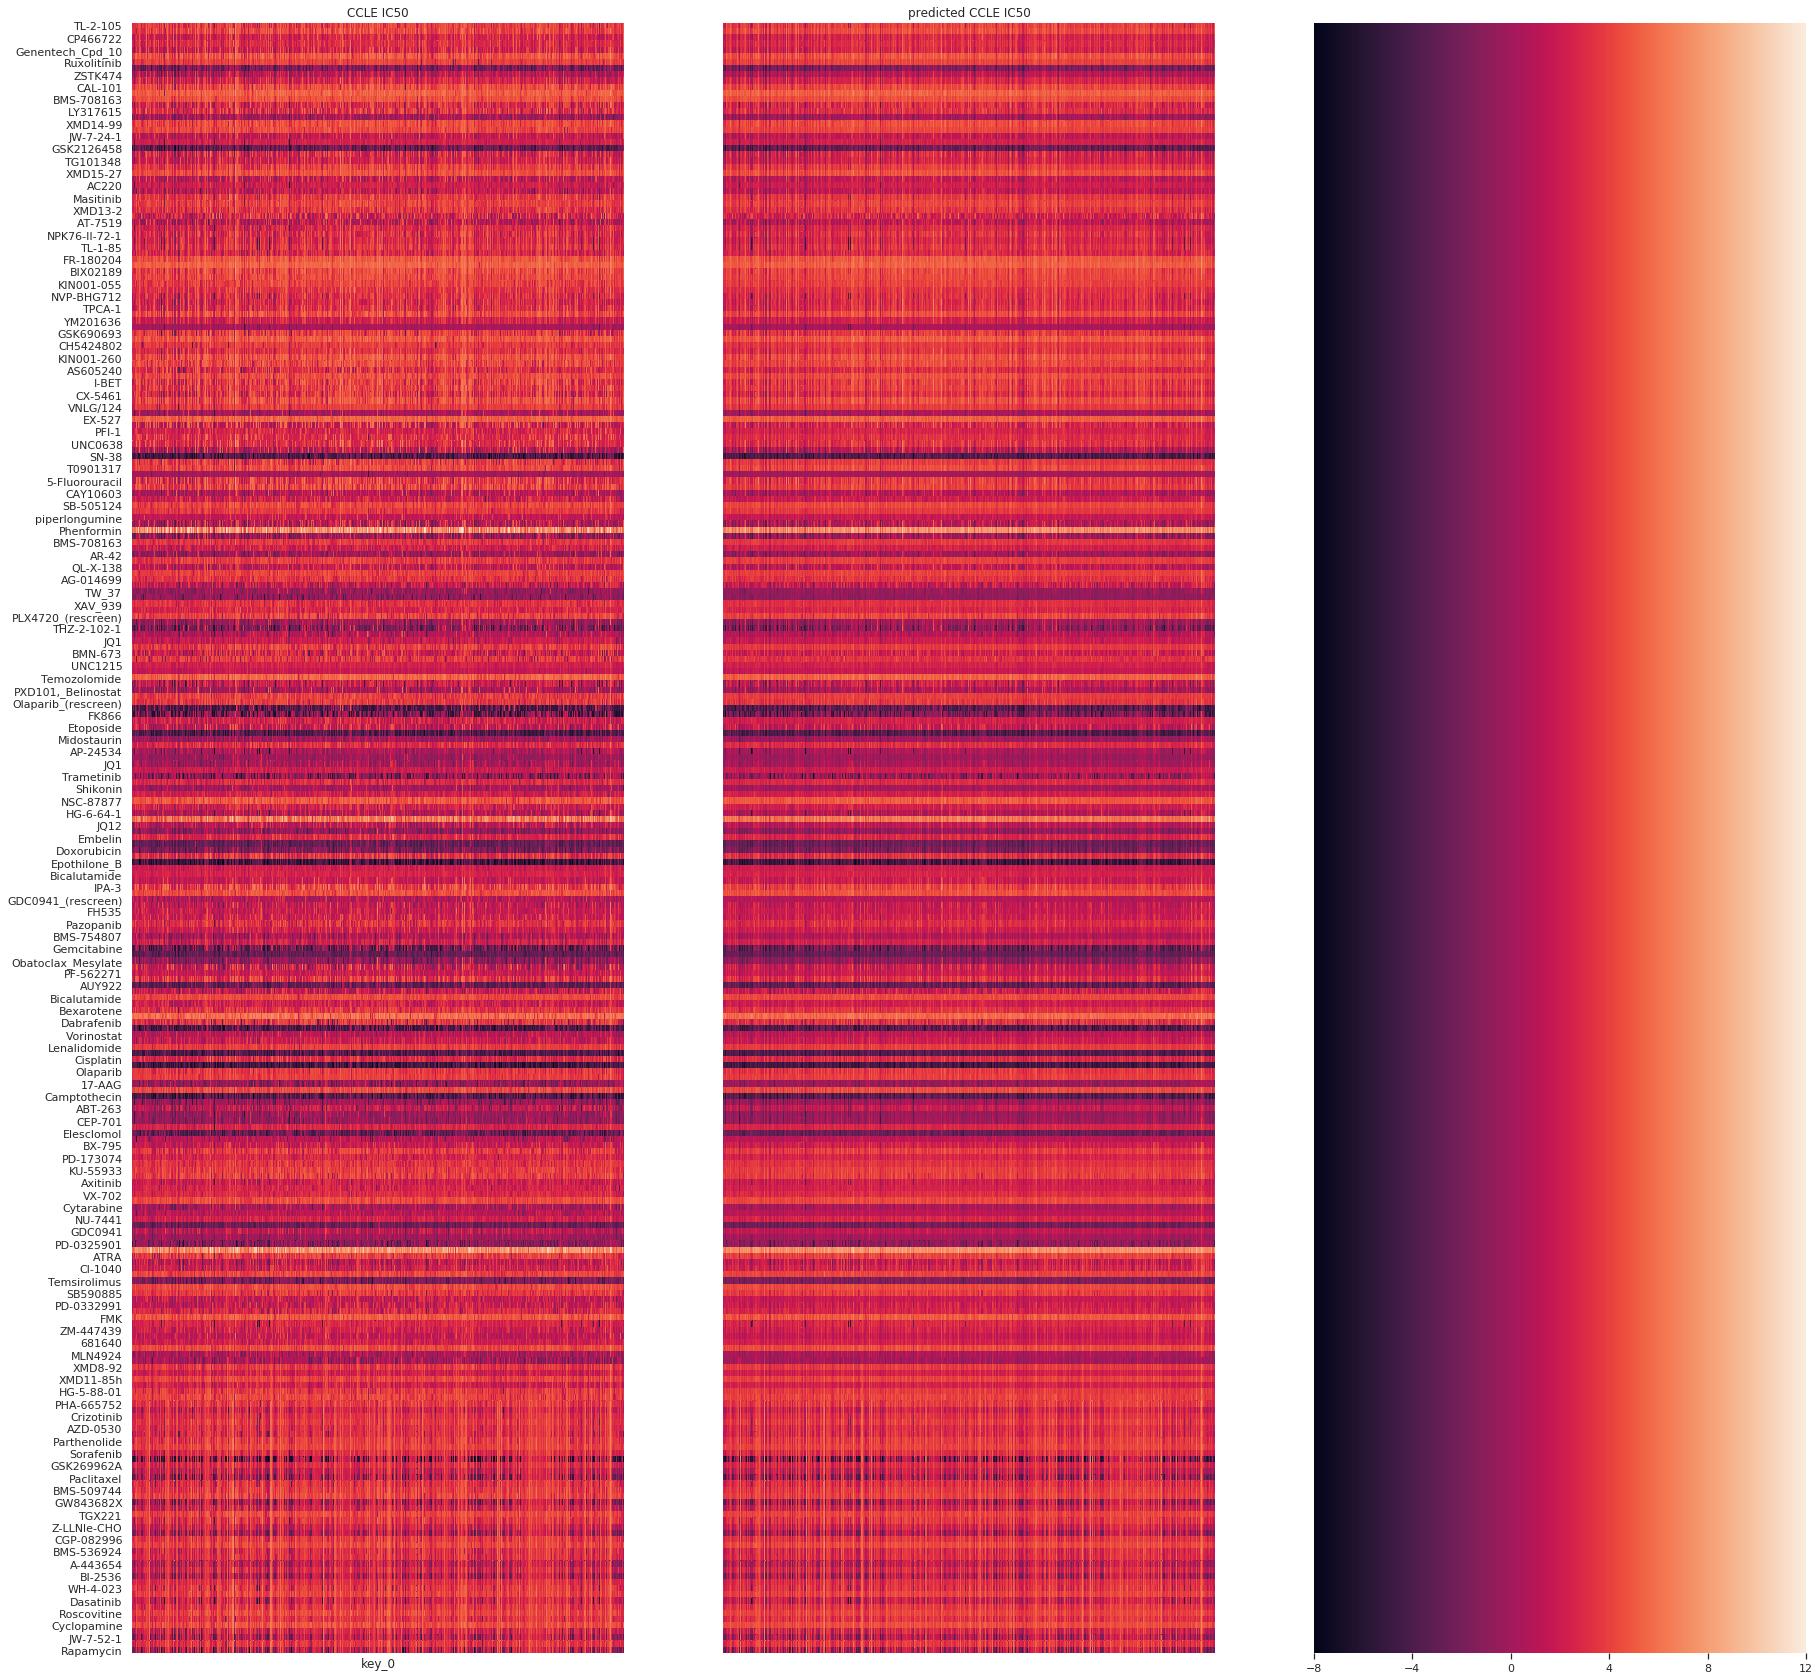

In [68]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, figsize=(30,30))

sns.heatmap(y_CCLE_IC50, vmin=-8, vmax=12, ax = axs[0],cbar=False, xticklabels=False).set_title('CCLE IC50')
sns.heatmap(p_CCLE_IC50,  vmin=-8, vmax=12,  ax = axs[1],yticklabels=False, xticklabels=False, cbar_ax = axs[2],cbar_kws={"orientation": "horizontal"} ).set_title('predicted CCLE IC50')


In [124]:
p_valid = IC50_Predictor.predict(X_valid)
y_valid 
p_valid.shape

(61, 265)

In [140]:
r = np.corrcoef(p_valid[2],y_valid.values[2] )
r

array([[1.        , 0.95262634],
       [0.95262634, 1.        ]])

In [143]:
s =  [np.corrcoef(i,j) for i,j in zip(p_valid,y_valid.values) ]

In [155]:
pearsonc = [i[0,1] for i in s]
len(pearsonc)

61

Text(0.5,1,'Sample-wise Pearson correlation in log IC50 for CCLE validation sample')

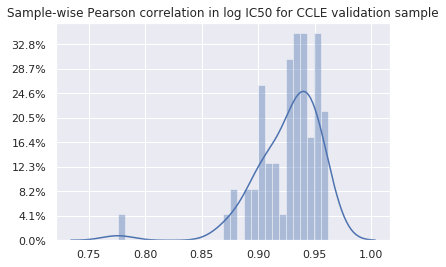

In [177]:
from matplotlib.ticker import PercentFormatter
sns.set();

ax = sns.distplot(pearsonc, bins = 30)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=len(pearsonc)))
ax.set_title('Sample-wise Pearson correlation in log IC50 for CCLE validation sample')